<a href="https://colab.research.google.com/github/majoGel/GProjects/blob/main/ReportTerna_PrezziZonali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA LOADING**

In [ ]:
import datetime
import pandas as pd
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt

In [ ]:
# Specifica il percorso del file Excel
#file_path = '/content/drive/My Drive/Progetti/2018_W6_GME.xlsx'
file_path = 'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2018_W6_GME.xlsx'
excel_file = pd.ExcelFile(file_path)
# Leggi il primo foglio (sheet) del file Excel
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = pd.read_excel(file_path, sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

df = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
df = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(df.head())
formatted_days = list(map(lambda d: datetime.datetime.strptime(d, '%Y%m%d').strftime('%d/%m/%y'), excel_file.sheet_names))


In [ ]:
#Import YoY dataset
# Specifica il percorso del file Excel
file_path = 'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2017_W6_GME.xlsx'

# Leggi il primo foglio (sheet) del file Excel
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = pd.read_excel(file_path, sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

YoYdf = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
YoYdf = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(YoYdf.head())
del dfs

#**DATA PREPARATION**

In [31]:
df['INTERVAL_NO_Key']=  df['DAY'].astype(str) +"_"+ df['INTERVAL_NO'].astype(str)
YoYdf['INTERVAL_NO_Key']=  YoYdf['DAY'].astype(str) +"_"+ YoYdf['INTERVAL_NO'].astype(str)
df['UP_UC'] = df['UNIT_REFERENCE_NO'].str[:2]
YoYdf['UP_UC'] = YoYdf['UNIT_REFERENCE_NO'].str[:2]
df['BID_OFFER_DATE_DT'] = pd.to_datetime(df['BID_OFFER_DATE_DT'], format='%Y%m%d')
zone_values = ['CNOR', 'NORD', 'CSUD', 'SUD', 'SARD', 'SICI']


In [44]:
#df_Off_Ac
df_Off_Ac = df[(df['STATUS_CD'] == 'ACC') & (df['PURPOSE_CD'] == 'OFF')]
df_Off_Ac = df_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#df_PUN
df_PUN = df_Off_Ac[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
df_PUN = df_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})
df_PUNnord = df_Off_Ac[df_Off_Ac['ZONE_CD'] == 'NORD']
df_PUNcnord = df_Off_Ac[df_Off_Ac['ZONE_CD'] == 'CNOR']
df_PUNcsud = df_Off_Ac[df_Off_Ac['ZONE_CD'] == 'CSUD']
df_PUNsud = df_Off_Ac[df_Off_Ac['ZONE_CD'] == 'SUD']
df_PUNsard = df_Off_Ac[df_Off_Ac['ZONE_CD'] == 'SARD']
df_PUNsici = df_Off_Ac[df_Off_Ac['ZONE_CD'] == 'SICI']
#print(len(df_PUNcnord))
#KPI per tabella PUN
KPI_AvgPUN = df_PUN['PUN'].mean()
KPI_AVGPUN_nord =df_PUNnord['AWARDED_PRICE_NO'].mean()
KPI_AVGPUN_cnord =df_PUNcnord['AWARDED_PRICE_NO'].mean()
KPI_AVGPUN_csud =df_PUNcsud['AWARDED_PRICE_NO'].mean()
KPI_AVGPUN_sud =df_PUNsud['AWARDED_PRICE_NO'].mean()
KPI_AVGPUN_sard =df_PUNsard['AWARDED_PRICE_NO'].mean()
KPI_AVGPUN_sici =df_PUNsici['AWARDED_PRICE_NO'].mean()
#print(KPI_AvgPUN,KPI_AVGPUN_nord,KPI_AVGPUN_cnord,KPI_AVGPUN_csud,KPI_AVGPUN_sud,KPI_AVGPUN_sard,KPI_AVGPUN_sici)

KPI_maxPUN = df_PUN['PUN'].max()
KPI_maxPUN_nord =df_PUNnord['AWARDED_PRICE_NO'].max()
KPI_maxPUN_cnord =df_PUNcnord['AWARDED_PRICE_NO'].max()
KPI_maxPUN_csud =df_PUNcsud['AWARDED_PRICE_NO'].max()
KPI_maxPUN_sud =df_PUNsud['AWARDED_PRICE_NO'].max()
KPI_maxPUN_sard =df_PUNsard['AWARDED_PRICE_NO'].max()
KPI_maxPUN_sici =df_PUNsici['AWARDED_PRICE_NO'].max()

KPI_minPUN = df_PUN['PUN'].min()
KPI_minPUN_nord =df_PUNnord['AWARDED_PRICE_NO'].min()
KPI_minPUN_cnord =df_PUNcnord['AWARDED_PRICE_NO'].min()
KPI_minPUN_csud =df_PUNcsud['AWARDED_PRICE_NO'].min()
KPI_minPUN_sud =df_PUNsud['AWARDED_PRICE_NO'].min()
KPI_minPUN_sard =df_PUNsard['AWARDED_PRICE_NO'].min()
KPI_minPUN_sici =df_PUNsici['AWARDED_PRICE_NO'].min()
print(KPI_minPUN,KPI_minPUN_nord,KPI_minPUN_cnord,KPI_minPUN_csud,KPI_minPUN_sud)
#Spread
Spread_nord = round((KPI_AVGPUN_nord - KPI_AvgPUN)/100,2)
Spread_cnord = round((KPI_AVGPUN_cnord - KPI_AvgPUN)/100,2)
Spread_csud = round((KPI_AVGPUN_csud - KPI_AvgPUN)/100,2)
Spread_sud = round((KPI_AVGPUN_sud - KPI_AvgPUN)/100,2)
Spread_sard = round((KPI_AVGPUN_sard - KPI_AvgPUN)/100,2)
Spread_sici = round((KPI_AVGPUN_sici - KPI_AvgPUN)/100,2)
print(Spread_nord,Spread_cnord,Spread_csud,Spread_sud,Spread_sard,Spread_sici)
#Dataframe Spread per plot

df_plotSpread = df_Off_Ac[df_Off_Ac['ZONE_CD'].isin(zone_values)]
df_plotSpread = df_plotSpread.groupby(['INTERVAL_NO','INTERVAL_NO_Key','DAY', 'ZONE_CD'])['AWARDED_PRICE_NO'].mean().reset_index()
df_plotPUN = df_PUN.groupby(['INTERVAL_NO_Key'])['PUN'].mean().reset_index()
df_plotSpread = pd.merge(df_plotSpread,df_plotPUN,how="left",on = 'INTERVAL_NO_Key')
df_plotSpread['Delta'] = round(( df_plotSpread['AWARDED_PRICE_NO']-df_plotSpread['PUN'])/100,2)
df_plotSpread = df_plotSpread.sort_values(by=['DAY','INTERVAL_NO'], ascending=True)

print(df_plotSpread)
#print(df_Spread)
del df_PUNnord
del df_PUNcnord
del df_PUNcsud
del df_PUNsud
del df_PUNsici
del df_PUNsard
del df_PUN
#Prezzi orari
df_Off_Ac['Day_Type'] = df_Off_Ac['BID_OFFER_DATE_DT'].apply(lambda x: 'Weekday' if x.weekday() < 5 else 'Weekend')
Picco_values =[9,10,11,12,13,14,15,16,17,18,19,20]
df_Picco = df_Off_Ac[(df_Off_Ac['INTERVAL_NO'].isin(Picco_values)) & (df_Off_Ac['Day_Type'] == 'Weekday')]
df_NoPicco = df_Off_Ac[~df_Off_Ac['INTERVAL_NO'].isin(Picco_values) | (df_Off_Ac['Day_Type'] != 'Weekday')]

df_PUNPicconord = df_Picco[df_Picco['ZONE_CD'] == 'NORD']
df_PUNPiccocnord = df_Picco[df_Picco['ZONE_CD'] == 'CNOR']
df_PUNPiccocsud = df_Picco[df_Picco['ZONE_CD'] == 'CSUD']
df_PUNPiccosud = df_Picco[df_Picco['ZONE_CD'] == 'SUD']
df_PUNPiccosard = df_Picco[df_Picco['ZONE_CD'] == 'SARD']
df_PUNPiccosici = df_Picco[df_Picco['ZONE_CD'] == 'SICI']

#KPI Picco
KPI_AvgPUNPicco = df_Picco['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNPicco_nord =df_PUNPicconord['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNPicco_cnord =df_PUNPiccocnord['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNPicco_csud =df_PUNPiccocsud['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNPicco_sud =df_PUNPiccosud['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNPicco_sard =df_PUNPiccosard['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNPicco_sici =df_PUNPiccosici['AWARDED_PRICE_NO'].mean()

df_PUNFPicconord = df_NoPicco[df_NoPicco['ZONE_CD'] == 'NORD']
df_PUNFPiccocnord = df_NoPicco[df_NoPicco['ZONE_CD'] == 'CNOR']
df_PUNFPiccocsud = df_NoPicco[df_NoPicco['ZONE_CD'] == 'CSUD']
df_PUNFPiccosud = df_NoPicco[df_NoPicco['ZONE_CD'] == 'SUD']
df_PUNFPiccosard = df_NoPicco[df_NoPicco['ZONE_CD'] == 'SARD']
df_PUNFPiccosici = df_NoPicco[df_NoPicco['ZONE_CD'] == 'SICI']

KPI_AvgPUNFPicco = df_NoPicco['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNFPicco_nord =df_PUNFPicconord['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNFPicco_cnord =df_PUNFPiccocnord['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNFPicco_csud =df_PUNFPiccocsud['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNFPicco_sud =df_PUNFPiccosud['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNFPicco_sard =df_PUNFPiccosard['AWARDED_PRICE_NO'].mean()
KPI_AVGPUNFPicco_sici =df_PUNFPiccosici['AWARDED_PRICE_NO'].mean()
#print(df_NoPicco[df_NoPicco['Day_Type'] == 'Weekday'])

2846 2846 2846 2846 2846
0.13 -0.56 -1.53 -2.14 -1.75 9.44
      INTERVAL_NO INTERVAL_NO_Key   DAY ZONE_CD  AWARDED_PRICE_NO  \
0               1          DAY1_1  DAY1    CNOR            4294.0   
1               1          DAY1_1  DAY1    CSUD            4294.0   
2               1          DAY1_1  DAY1    NORD            4294.0   
3               1          DAY1_1  DAY1    SARD            4294.0   
4               1          DAY1_1  DAY1    SICI            6201.0   
...           ...             ...   ...     ...               ...   
1003           24         DAY7_24  DAY7    CSUD            4380.0   
1004           24         DAY7_24  DAY7    NORD            4380.0   
1005           24         DAY7_24  DAY7    SARD            4380.0   
1006           24         DAY7_24  DAY7    SICI            4997.0   
1007           24         DAY7_24  DAY7     SUD            4380.0   

              PUN  Delta  
0     4464.003876  -1.70  
1     4464.003876  -1.70  
2     4464.003876  -1.70  
3   

In [49]:
#YoYdf Data preparation
#YoYdf_Off_Ac
YoYdf_Off_Ac = YoYdf[(YoYdf['STATUS_CD'] == 'ACC') & (YoYdf['PURPOSE_CD'] == 'OFF')]
YoYdf_Off_Ac = YoYdf_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#YoYdf_PUN
YoYdf_PUN = YoYdf_Off_Ac.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
YoYdf_PUN = YoYdf_PUN[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
YoYdf_PUN = YoYdf_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})
YoYdf_PUNnord = YoYdf_Off_Ac[YoYdf_Off_Ac['ZONE_CD'] == 'NORD']
YoYdf_PUNcnord = YoYdf_Off_Ac[YoYdf_Off_Ac['ZONE_CD'] == 'CNOR']
YoYdf_PUNcsud = YoYdf_Off_Ac[YoYdf_Off_Ac['ZONE_CD'] == 'CSUD']
YoYdf_PUNsud = YoYdf_Off_Ac[YoYdf_Off_Ac['ZONE_CD'] == 'SUD']
YoYdf_PUNsard = YoYdf_Off_Ac[YoYdf_Off_Ac['ZONE_CD'] == 'SARD']
YoYdf_PUNsici = YoYdf_Off_Ac[YoYdf_Off_Ac['ZONE_CD'] == 'SICI']

#KPI per tabella PUN
YoYKPI_AvgPUN = YoYdf_PUN['PUN'].mean()
YoYKPI_AVGPUN_nord =YoYdf_PUNnord['AWARDED_PRICE_NO'].mean()
YoYKPI_AVGPUN_cnord =YoYdf_PUNcnord['AWARDED_PRICE_NO'].mean()
YoYKPI_AVGPUN_csud =YoYdf_PUNcsud['AWARDED_PRICE_NO'].mean()
YoYKPI_AVGPUN_sud =YoYdf_PUNsud['AWARDED_PRICE_NO'].mean()
YoYKPI_AVGPUN_sard =YoYdf_PUNsard['AWARDED_PRICE_NO'].mean()
YoYKPI_AVGPUN_sici =YoYdf_PUNsici['AWARDED_PRICE_NO'].mean()
print(YoYKPI_AvgPUN,YoYKPI_AVGPUN_nord,YoYKPI_AVGPUN_cnord,YoYKPI_AVGPUN_csud,YoYKPI_AVGPUN_sud,YoYKPI_AVGPUN_sard,YoYKPI_AVGPUN_sici)

YoYDelta_AvgPUN = round(((KPI_AvgPUN -YoYKPI_AvgPUN)/YoYKPI_AvgPUN)*100,0)
YoYDelta_AvgPUN_nord = round(((KPI_AVGPUN_nord -YoYKPI_AVGPUN_nord)/YoYKPI_AVGPUN_nord)*100,0)
YoYDelta_AvgPUN_cnord = round(((KPI_AVGPUN_cnord -YoYKPI_AVGPUN_cnord)/YoYKPI_AVGPUN_cnord)*100,0)
YoYDelta_AvgPUN_csud = round(((KPI_AVGPUN_csud -YoYKPI_AVGPUN_csud)/YoYKPI_AVGPUN_csud)*100,0)
YoYDelta_AvgPUN_sard = round(((KPI_AVGPUN_sud -YoYKPI_AVGPUN_sud)/YoYKPI_AVGPUN_sud)*100,0)
YoYDelta_AvgPUN_sud = round(((KPI_AVGPUN_sard -YoYKPI_AVGPUN_sard)/YoYKPI_AVGPUN_sard)*100,0)
YoYDelta_AvgPUN_sici = round(((KPI_AVGPUN_sici -YoYKPI_AVGPUN_sici)/YoYKPI_AVGPUN_sici)*100,0)

print(YoYDelta_AvgPUN,YoYDelta_AvgPUN_nord,YoYDelta_AvgPUN_cnord,YoYDelta_AvgPUN_csud,YoYDelta_AvgPUN_sud,YoYDelta_AvgPUN_sard,YoYDelta_AvgPUN_sici)

#Spread
YoYSpread_nord = round((YoYKPI_AVGPUN_nord - YoYKPI_AvgPUN)/100,2)
YoYSpread_cnord = round((YoYKPI_AVGPUN_cnord - YoYKPI_AvgPUN)/100,2)
YoYSpread_csud = round((YoYKPI_AVGPUN_csud - YoYKPI_AvgPUN)/100,2)
YoYSpread_sud = round((YoYKPI_AVGPUN_sud - YoYKPI_AvgPUN)/100,2)
YoYSpread_sard = round((YoYKPI_AVGPUN_sard - YoYKPI_AvgPUN)/100,2)
YoYSpread_sici = round((YoYKPI_AVGPUN_sici - YoYKPI_AvgPUN)/100,2)
print(YoYDelta_AvgPUN,YoYSpread_nord,YoYSpread_cnord,YoYSpread_csud,YoYSpread_sud,YoYSpread_sard,YoYSpread_sici)


YoYdf_plotSpread = YoYdf_PUNsici
YoYdf_plotSpread = YoYdf_plotSpread.groupby(['INTERVAL_NO','INTERVAL_NO_Key','DAY', 'ZONE_CD'])['AWARDED_PRICE_NO'].mean().reset_index()
YoYdf_plotSpread = pd.merge(YoYdf_plotSpread,df_plotPUN,how="left",on = 'INTERVAL_NO_Key')
YoYdf_plotSpread['Delta'] = round(( YoYdf_plotSpread['AWARDED_PRICE_NO']-YoYdf_plotSpread['PUN'])/100,2)
YoYdf_plotSpread = YoYdf_plotSpread.sort_values(by=['DAY','INTERVAL_NO'], ascending=True)
YoYdf_plotSpread = YoYdf_plotSpread.rename(columns = {'Delta' : "SICI2017"})
print(YoYdf_plotSpread)

5952.541666666667 6359.7834144409235 6151.506431742006 5922.529974115617 5610.411365126956 5914.783848896598 5972.647656016721
-15.0 -20.0 -19.0 -17.0 -17.0 -14.0 1.0
-15.0 4.07 1.99 -0.3 -3.42 -0.38 0.2
     INTERVAL_NO INTERVAL_NO_Key   DAY ZONE_CD  AWARDED_PRICE_NO          PUN  \
0              1          DAY1_1  DAY1    SICI            4331.0  4464.003876   
7              2          DAY1_2  DAY1    SICI            4140.0  4088.000000   
14             3          DAY1_3  DAY1    SICI            3827.0  3798.000000   
21             4          DAY1_4  DAY1    SICI            3510.0  3894.000000   
28             5          DAY1_5  DAY1    SICI            3630.0  3977.000000   
..           ...             ...   ...     ...               ...          ...   
139           20         DAY7_20  DAY7    SICI            9069.0  5473.777174   
146           21         DAY7_21  DAY7    SICI            9069.0  5297.083333   
153           22         DAY7_22  DAY7    SICI            7489.0  5

     CNOR  CSUD  NORD  SARD   SICI   SUD  SICI2017
0   -1.70 -1.70 -1.70 -1.70  17.37 -1.70     -1.33
1    0.00  0.00  0.00  0.00   0.00  0.00      0.52
2    0.00  0.00  0.00  0.00   0.00  0.00      0.29
3    0.00  0.00  0.00  0.00   0.00  0.00     -3.84
4    0.00  0.00  0.00  0.00   0.00  0.00     -3.47
..    ...   ...   ...   ...    ...   ...       ...
163 -2.74 -2.74 -2.74 -2.74  29.76 -2.74     35.95
164 -2.97 -2.97 -2.97 -2.97  31.53 -2.97     37.72
165 -3.15 -3.15 -3.15 -3.15  32.30 -3.15     22.69
166 -3.24 -3.24 -3.24 -3.24  32.27 -3.24     11.15
167 -0.55 -0.55 -0.55 -0.55   5.62 -0.55     16.00

[168 rows x 7 columns]


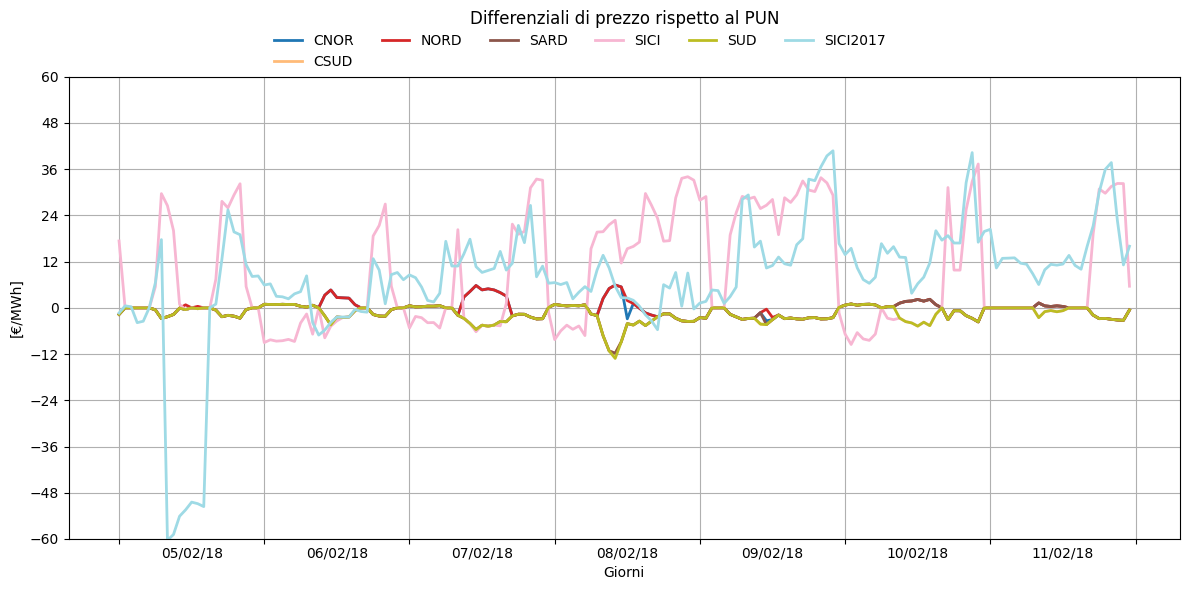

In [59]:
import matplotlib.ticker as ticker
# Creazione della tabella pivot per classificazione TERNA e assegnazione dei valori in GWh
df_pivot = df_plotSpread.pivot(index=['DAY','INTERVAL_NO','INTERVAL_NO_Key'], columns='ZONE_CD', values='Delta')
df_pivot = df_pivot.fillna(0)  # Riempire i NaN con 0 per evitare errori nel grafico
df_pivot = pd.merge(df_pivot , YoYdf_plotSpread[['INTERVAL_NO_Key','SICI2017']],how="left",on="INTERVAL_NO_Key" )
df_pivot = df_pivot.drop(columns=['INTERVAL_NO_Key'])
print(df_pivot)
# Prepariamo il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea un array di colori per ciascuna serie di ZONE_CD
colors = plt.cm.tab20(np.linspace(0, 1, len(df_pivot.columns)))

# Traccia le linee per ogni zona
for i, zone in enumerate(df_pivot.columns):
    series_values = df_pivot[zone].values
    ax1.plot(range(len(series_values)), series_values, label=zone, color=colors[i], linewidth=2)

# Configurazione degli assi
ax1.set_xlabel('Giorni')
ax1.set_ylabel('[€/MWh]')

# Limiti dell'asse y e ticks
max_gwh = 60  # Massimo per asse y
min_gwh = -60
num_divisions = 10  # Numero di righe di riferimento

ax1.set_ylim(min_gwh, max_gwh)
ax1.set_yticks(np.linspace(min_gwh, max_gwh, num_divisions + 1))

# Configurare le etichette dell'asse x con righe di riferimento allineate a ore 0 e etichette centrate
ax1.set_xticks([i * 24 for i in range(8)])  # Righe di riferimento all'ora 0 per ogni giorno
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(24))  # Tick minori a ogni 24 ore per centrare le label

# Impostare le label solo sui tick minori
ax1.set_xticklabels([])
ax1.set_xticks([12 + i * 24 for i in range(7)], minor=True)  # Tick minori per posizionare le label centrali
ax1.set_xticklabels(x_labels, minor=True)

# Allineare le label centrali
for label in ax1.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')

# Aggiungere la legenda in alto, disattivando il bordo
ax1.legend(loc='upper center', bbox_to_anchor=(0.46, 1.12), ncol=6, frameon=False)

# Allineare le griglie degli assi y e x
ax1.grid(True)

# Nascondere i tick minori usati per posizionare le label
ax1.tick_params(axis='x', which='minor', bottom=False)

# Aggiunta del titolo e layout
plt.title('Differenziali di prezzo rispetto al PUN', pad=38)
plt.tight_layout()

# Salva il grafico come immagine
plt.savefig('2_2_PREZZI_ZONALI.png')
plt.show()


In [ ]:
# Tabella Prezzi Zonali
data = {
    '[€/MWh]': ['Media', 'yoy', 'Spread','Spread2017','Fuori Picco','Picco','Minimo','Massimo'],
    'PUN': [round(KPI_AvgPUN/100,2),YoYDelta_AvgPUN ,'--','--',round(KPI_AvgPUNFPicco/100,2),round(KPI_AvgPUNPicco/100,2),
            round(KPI_minPUN/100,2),round(KPI_maxPUN/100,2)],
    'Nord': [round(KPI_AVGPUN_nord/100,2),YoYDelta_AvgPUN_nord ,Spread_nord,YoYSpread_nord,round(KPI_AVGPUNFPicco_nord/100,2),
             round(KPI_AVGPUNPicco_nord/100,2),round(KPI_minPUN_nord/100,2),round(KPI_maxPUN_nord/100,2)],
    'Centro Nord': [round(KPI_AVGPUN_cnord/100,2),YoYDelta_AvgPUN_cnord ,Spread_cnord,YoYSpread_cnord,round(KPI_AVGPUNFPicco_cnord/100,2),
             round(KPI_AVGPUNPicco_cnord/100,2),round(KPI_minPUN_cnord/100,2),round(KPI_maxPUN_cnord/100,2)],
    'Centro Sud': [round(KPI_AVGPUN_csud/100,2),YoYDelta_AvgPUN_csud ,Spread_csud,YoYSpread_csud,round(KPI_AVGPUNFPicco_csud/100,2),
             round(KPI_AVGPUNPicco_csud/100,2),round(KPI_minPUN_csud/100,2),round(KPI_maxPUN_csud/100,2)],
    'Sud': [round(KPI_AVGPUN_sud/100,2),YoYDelta_AvgPUN_sud ,Spread_sud,YoYSpread_sud,round(KPI_AVGPUNFPicco_sud/100,2),
             round(KPI_AVGPUN_sud/100,2),round(KPI_minPUN_sud/100,2),round(KPI_maxPUN_sud/100,2)],
    'Sardegna': [round(KPI_AVGPUN_sard/100,2),YoYDelta_AvgPUN_sard ,Spread_sard,YoYSpread_sard,round(KPI_AVGPUNFPicco_sard/100,2),
             round(KPI_AVGPUNPicco_sard/100,2),round(KPI_minPUN_sard/100,2),round(KPI_maxPUN_sard/100,2)],
    'Sicilia': [round(KPI_AVGPUN_sici/100,2),YoYDelta_AvgPUN_sici ,Spread_sici,YoYSpread_sici,round(KPI_AVGPUNFPicco_sici/100,2),
             round(KPI_AVGPUNPicco_sici/100,2),round(KPI_minPUN_sici/100,2),round(KPI_maxPUN_sici/100,2)],
}

# Crea il DataFrame
TAB_Pun = pd.DataFrame(data)
def style_columns(df):
    # Usa il metodo `style` di Pandas per formattare la tabella e arrotondare i numeri
    styled_df = df.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#2a66c7'), ('color', 'white'), ('font-weight', 'bold')]}]
    ).hide(axis="index")

    # Arrotonda le celle a 2 decimali nella visualizzazione
    styled_df = styled_df.format(precision=2)

    return styled_df
#Report Download
from google.colab import files
TAB_Pun.to_csv('1_PREZZI_ZONALI.csv', index=False)
#Scarica il file Excel
files.download('1_PREZZI_ZONALI.csv')
# Mostra la tabella formattata
styleTAB_Pun = style_columns(TAB_Pun)
styleTAB_Pun

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[€/MWh],PUN,Nord,Centro Nord,Centro Sud,Sud,Sardegna,Sicilia
Media,50.59,50.72,50.03,49.06,48.46,48.84,60.03
yoy,-15.00,-20.00,-19.00,-17.00,-17.00,-14.00,1.00
Spread,--,0.13,-0.56,-1.53,-2.14,-1.75,9.44
Spread2017,--,4.07,1.99,-0.30,-3.42,-0.38,0.20
Fuori Picco,46.62,46.36,45.88,46.00,45.35,45.76,53.59
Picco,56.53,57.06,56.42,53.57,48.46,53.23,69.87
Minimo,28.46,28.46,28.46,28.46,28.46,28.46,28.46
Massimo,90.05,73.95,73.95,73.95,73.95,73.95,90.05
